In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
data=pd.read_csv('DATA.csv')
data

,Sr. No.,FG,FG Position,Redox Potential,mol_filename_neutral,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_methoxy,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_priamide,fr_sulfide
0,Phenazine,-,-,-1.74,PHENAZINE_neutral,4.515185,0.950185,4.515185,0.950185,0.496980,...,0,0,0,0,0,4,0,0,0,0
1,1,2CH3N,1,-1.85,2CH3N_R1_neutral,4.694722,0.939167,4.694722,0.939167,0.593906,...,0,0,0,0,0,3,0,0,0,0
2,2,2CH3N,2,-1.98,2CH3N_R2_neutral,4.631574,0.939167,4.631574,0.939167,0.593906,...,0,0,0,0,0,2,0,0,0,0
3,3,NH2,1,-1.85,NH2_R1_neutral,5.844735,0.671994,5.844735,0.671994,0.442254,...,0,0,0,0,0,3,0,0,0,0
4,4,NH2,2,-1.92,NH2_R2_neutral,5.700164,0.714890,5.700164,0.714890,0.442254,...,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,185,NO2,1 2 6 7,-0.35,NO2_R1267_neutral,11.230655,-1.013112,11.230655,0.251483,0.377663,...,0,0,4,4,0,0,0,0,0,0
181,186,NO2,1 4 6 9,-0.52,NO2_R1469_neutral,11.151935,-0.893097,11.151935,0.583057,0.377663,...,0,0,4,4,4,0,0,0,0,0
182,187,NO2,2 3 7 8,-0.52,NO2_R2378_neutral,10.985181,-0.970500,10.985181,0.126897,0.377663,...,0,0,4,4,0,0,0,0,0,0
183,188,NO2,1 2 3 4 6 9,0.16,NO2_R123469_neutral,11.524990,-1.915802,11.524990,0.598243,0.295353,...,0,0,6,6,2,0,0,0,0,0


In [15]:
data.describe()

,Redox Potential,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_methoxy,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_priamide,fr_sulfide
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,-1.418162,8.357724,0.017421,8.357724,0.334495,0.459133,251.739665,243.822778,251.563366,91.286486,...,0.021622,0.918919,0.427027,0.427027,0.194595,1.059459,0.502703,0.502703,0.010811,0.010811
std,0.680095,2.312979,0.749930,2.312979,0.276733,0.105647,47.312133,49.239681,47.301247,16.397544,...,0.145839,1.680747,1.218661,1.218661,0.638419,1.094318,1.319273,1.319273,0.103692,0.103692
min,-2.390000,4.515185,-4.419993,4.515185,0.000190,0.164131,180.210000,172.146000,180.068748,66.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-1.950000,5.893783,-0.305331,5.893783,0.111088,0.377663,225.207000,214.167000,225.053826,82.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.690000,9.197306,0.209964,9.197306,0.268600,0.447395,240.270000,228.174000,240.112344,90.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.820000,9.685346,0.485710,9.685346,0.496068,0.563308,270.204000,264.156000,270.038905,98.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,0.800000,13.411611,0.954259,13.411611,1.660140,0.644787,540.186000,540.186000,539.949374,194.000000,...,1.000000,8.000000,8.000000,8.000000,4.000000,4.000000,8.000000,8.000000,1.000000,1.000000


In [7]:
X=data.drop(columns=['Sr. No.','FG','FG Position','Redox Potential','mol_filename_neutral'])
y=data['Redox Potential']
X.shape,y.shape

((185, 134), (185,))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [14]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9977683777669072

In [19]:
print(reg.predict(X_test[-10:]))
print(list(y_test[-10:]))

[-1.91127791 -1.03445949 -0.40396763 -1.00124466 -0.53860907 -0.52561395
 -1.97000227 -0.78463582 -0.38635214 -1.94188008]
[-1.73, -1.1, -0.37, -0.94, -0.56, -0.45, -1.99, -0.8, -0.34, -1.88]


In [21]:
from sklearn.metrics import mean_squared_error
y_pred=reg.predict(X_test)
print(mean_squared_error(y_pred,y_test))
plt.scatter(y_test,y_pred)

738.7397140150701

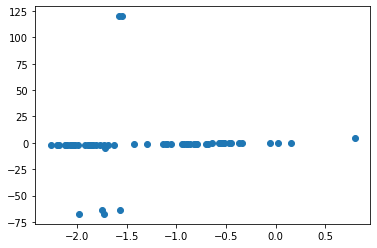

0.18284793741675665


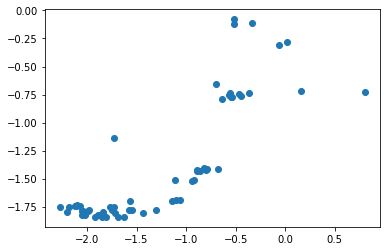

In [26]:
from sklearn.svm import SVR

svr=SVR(C=2, epsilon=0.2).fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred=svr.predict(X_test)
print(mean_squared_error(y_pred,y_test))
plt.scatter(y_test,y_pred)

0.010035189805874976


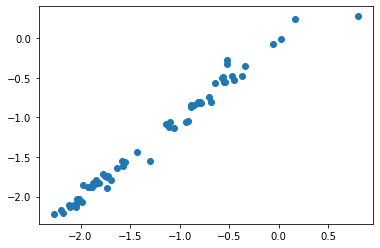

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor().fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred=gbr.predict(X_test)
print(mean_squared_error(y_pred,y_test))
plt.scatter(y_test,y_pred)